In [1]:
from google.colab import files
file  = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d zalando-research/fashionmnist

 86% 59.0M/68.8M [00:00<00:00, 97.9MB/s]
100% 68.8M/68.8M [00:00<00:00, 117MB/s] 


In [6]:
!dir

fashionmnist.zip  kaggle.json  sample_data


In [7]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [0]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [10]:
df_train.head() # Each row has one image pixels stacked horizontally, with first column as the label of that image.

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:

df_tr_n = np.array(df_train)
df_t_n = np.array(df_test)

x= df_tr_n[:,1:]    # For training input data without the label column
y= df_tr_n[:,0]     # the label data

xtest = df_t_n[:,1:]     #testing data without the label
ytest = df_t_n[:,0]      #labels

In [0]:
img_rows, img_cols = 28, 28
num_classes = 10

num_images = x.shape[0]

In [0]:
x = x.reshape(num_images, img_rows, img_cols, 1)
x = x / 255
y = keras.utils.to_categorical(y, num_classes)

In [0]:
xtest = xtest.reshape(xtest.shape[0], img_rows, img_cols, 1)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [0]:
label_map={0 :'T-shirt/top',
1 :'Trouser',
2 :'Pullover',
3 :'Dress',
4 :'Coat',
5 :'Sandal',
6 :'Shirt',
7 :'Sneaker',
8 :'Bag',
9 :'Ankle boot'}

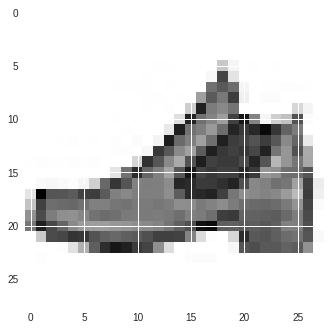

In [16]:
im = x[1,:].reshape((28,28))
plt.imshow(im)
plt.show()

In [17]:
#model-1

fashion_model = Sequential()
fashion_model.add(Conv2D(12,
                         kernel_size=3,
                         activation='relu',
                         input_shape = (img_rows, img_cols, 1)))
fashion_model.add(Conv2D(20,
                         kernel_size=3,
                         activation='relu'))
fashion_model.add(Conv2D(20,
                         kernel_size=3,
                         activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(100))
fashion_model.add(Dense(num_classes,
                       activation = 'softmax'))
fashion_model.compile(optimizer='adam',
                     loss= 'categorical_crossentropy',
                     metrics = ['accuracy'])
fashion_model.fit(x, y,
                 batch_size=100,
                  epochs = 4,
                  validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/4
48000/48000 [==============================] - 13s 264us/sample - loss: 0.4844 - acc: 0.8300 - val_loss: 0.3477 - val_acc: 0.8792
Epoch 2/4
48000/48000 [==============================] - 9s 197us/sample - loss: 0.3113 - acc: 0.8877 - val_loss: 0.3059 - val_acc: 0.8933
Epoch 3/4
48000/48000 [==============================] - 9s 198us/sample - loss: 0.2600 - acc: 0.9064 - val_loss: 0.2884 - val_acc: 0.8987
Epoch 4/4
48000/48000 [==============================] - 9s 197us/sample - loss: 0.2247 - acc: 0.9170 - val_loss: 0.2674 - val_acc: 0.9077


In [41]:
pred1 = fashion_model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 95us/sample - loss: 2.2503 - acc: 0.8566


In [42]:
print('Test loss:', pred1[0])
print('Test accuracy:', pred1[1])

Test loss: 2.2502892875671385
Test accuracy: 0.8566


In [50]:
#model-2
second_fashion_model = Sequential()
second_fashion_model.add(Conv2D(20,kernel_size=3,activation='relu',input_shape = (img_rows, img_cols, 1)))
second_fashion_model.add(Conv2D(40,kernel_size=3,activation='relu'))
second_fashion_model.add(Conv2D(80,kernel_size=3,activation='relu'))
second_fashion_model.add(Flatten())
second_fashion_model.add(Dense(800, activation='relu'))
second_fashion_model.add(Dense(100,activation='relu'))
second_fashion_model.add(Dense(10, activation='softmax'))
second_fashion_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
second_fashion_model.fit(x,y,batch_size=100,epochs=4,validation_split=0.2)
                                                    

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 36s 748us/sample - loss: 0.4076 - acc: 0.8520 - val_loss: 0.3097 - val_acc: 0.8864
Epoch 2/4
48000/48000 [==============================] - 35s 732us/sample - loss: 0.2405 - acc: 0.9098 - val_loss: 0.2621 - val_acc: 0.9087
Epoch 3/4
48000/48000 [==============================] - 35s 731us/sample - loss: 0.1671 - acc: 0.9375 - val_loss: 0.2395 - val_acc: 0.9126
Epoch 4/4
48000/48000 [==============================] - 35s 737us/sample - loss: 0.1150 - acc: 0.9570 - val_loss: 0.2786 - val_acc: 0.9128


In [53]:
pred2 = second_fashion_model.evaluate(xtest,ytest)

10000/10000 [==============================] - 2s 225us/sample - loss: 1.5488 - acc: 0.9024


In [54]:
print('Test loss:', pred2[0])
print('Test accuracy:', pred2[1])

Test loss: 1.5488497284889222
Test accuracy: 0.9024
